In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.sans-serif'] = 'SimHei' 
import seaborn as sns

In [2]:
df = pd.read_csv('./heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,blood_pressure,cholesterol,fasting blood sugar,resting ecg,heart_rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### As per our requirements and availability of sensors we are going to select some specific columns
  
* Input
    * Age
    * Sex (0 = `male` and 1 = `female`)
    * Heart Rate
    * Blood Pressure
    * Cholestrol
* Output
    * target (0 = `Yes` and 1 = `No`)

**Points to remember**

* Blood pressure is not an accurate predictor of a heart attack. Sometimes a heart attack can cause an increase or decrease in blood pressure, but having a change in blood pressure reading doesn’t always mean it’s heart-related. Instead, a better strategy for gauging a heart attack is to look at your overall symptoms.

**So We are looking for an overall symptoms**

# Data Preparation

In [3]:
# Selecting the mentioned columns
df_prepared = df[['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'target']]
df_prepared.head()

,age,sex,cholesterol,blood_pressure,heart_rate,target
0,40,1,289,140,172,0
1,49,0,180,160,156,1
2,37,1,283,130,98,0
3,48,0,214,138,108,1
4,54,1,195,150,122,0


In [4]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1190 non-null   int64
 1   sex             1190 non-null   int64
 2   cholesterol     1190 non-null   int64
 3   blood_pressure  1190 non-null   int64
 4   heart_rate      1190 non-null   int64
 5   target          1190 non-null   int64
dtypes: int64(6)
memory usage: 55.9 KB


In [5]:
sns.set_style('darkgrid') # for plots with dark background with some gridlines

<AxesSubplot:xlabel='target', ylabel='count'>

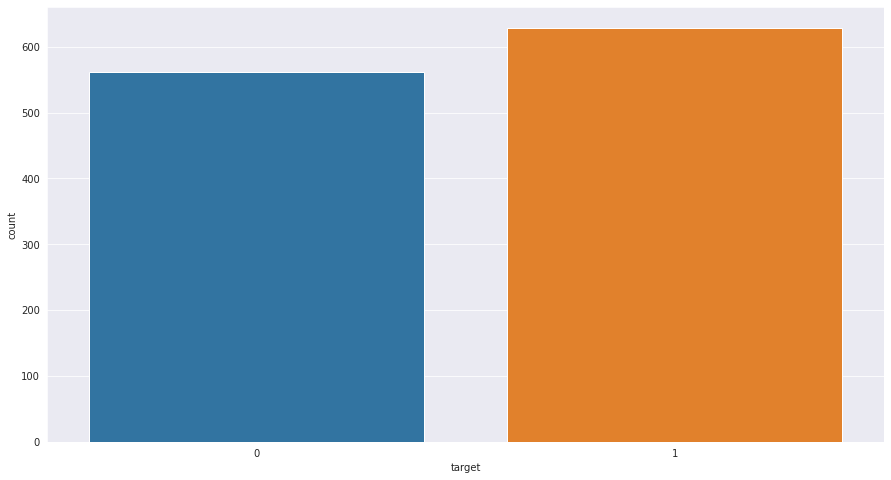

In [6]:
sns.countplot(data=df_prepared, x='target')

<AxesSubplot:xlabel='sex', ylabel='age'>

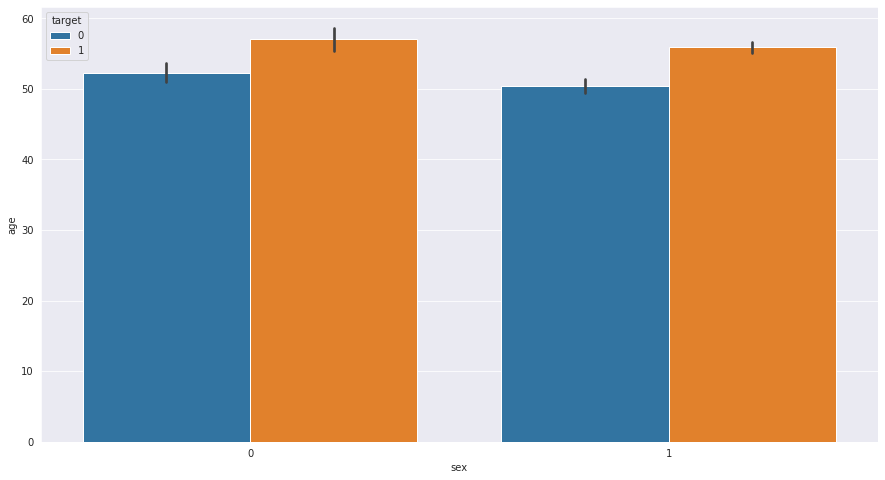

In [6]:
sns.barplot(data=df_prepared, x='sex', y='age', hue='target')

<AxesSubplot:>

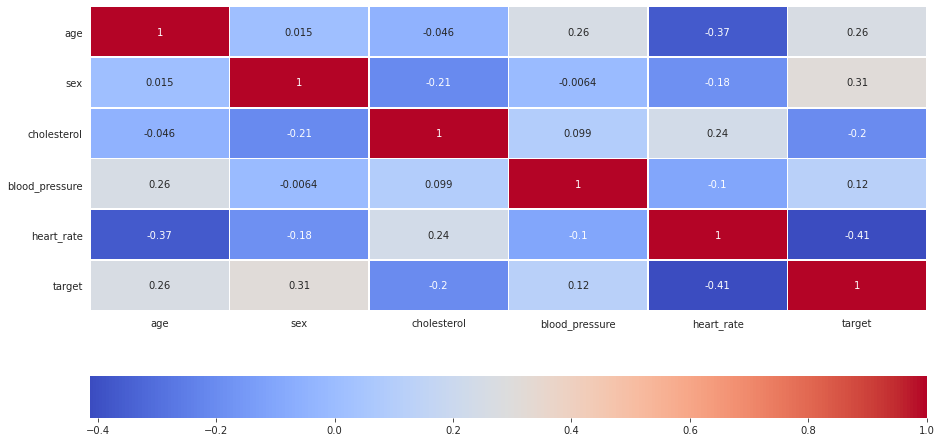

In [7]:
sns.heatmap(df_prepared.corr(), cmap='coolwarm', linewidths=.5, annot=True, cbar_kws={"orientation": "horizontal"})

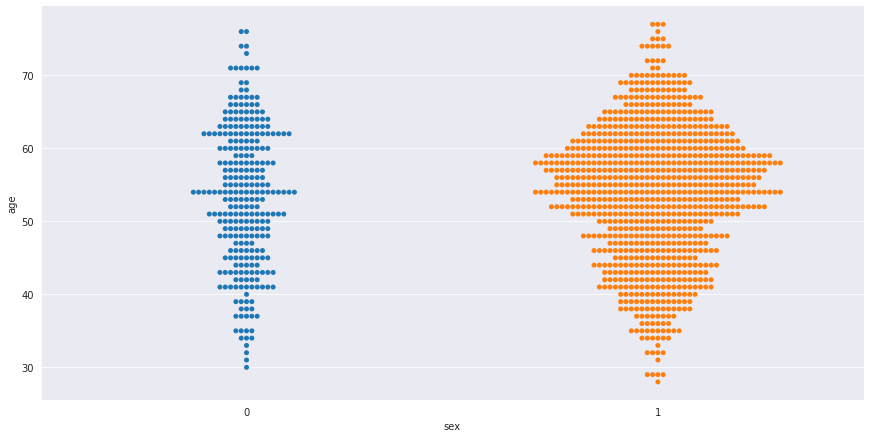

In [8]:
sns.catplot(data=df_prepared, x='sex', y='age', kind='swarm',height=6,aspect=2)

In [9]:
X = df_prepared.iloc[:, :-1].values
y=df_prepared.iloc[:, -1].values

In [10]:
X

array([[ 40,   1, 289, 140, 172],
       [ 49,   0, 180, 160, 156],
       [ 37,   1, 283, 130,  98],
       ...,
       [ 57,   1, 131, 130, 115],
       [ 57,   0, 236, 130, 174],
       [ 38,   1, 175, 138, 173]])

In [11]:
y

array([0, 1, 0, ..., 1, 1, 0])

In [12]:
X.shape

(1190, 5)

In [13]:
y.shape

(1190,)

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52, test_size=0.15)

In [16]:
X_train

array([[ 39,   0, 182, 110, 180],
       [ 50,   1, 200, 144, 126],
       [ 65,   1, 177, 120, 140],
       ...,
       [ 48,   1, 159, 100, 100],
       [ 55,   1, 262, 130, 155],
       [ 56,   0, 288, 200, 133]])

In [18]:
X_test

array([[ 44,   1, 219, 130, 188],
       [ 42,   1, 196, 120, 150],
       [ 46,   1, 275, 140, 165],
       [ 45,   0, 234, 130, 175],
       [ 64,   1, 306, 143, 115],
       [ 54,   0, 230, 120, 140],
       [ 47,   0, 235, 130, 145],
       [ 55,   1, 223, 122, 100],
       [ 43,   1, 177, 120, 120],
       [ 64,   1, 227, 170, 155],
       [ 53,   1, 518, 145, 130],
       [ 53,   1,   0, 130, 120],
       [ 50,   1, 231, 140, 140],
       [ 55,   0, 394, 130, 150],
       [ 48,   1, 222, 122, 186],
       [ 40,   1, 223, 152, 181],
       [ 64,   1, 212, 145, 132],
       [ 56,   1, 256, 130, 142],
       [ 38,   1,   0, 115, 128],
       [ 61,   1,   0, 130,  77],
       [ 65,   1, 235, 150, 120],
       [ 55,   1, 226, 120, 127],
       [ 52,   1, 186, 118, 190],
       [ 56,   1, 230, 150, 124],
       [ 47,   1, 275, 110, 118],
       [ 71,   0, 302, 160, 162],
       [ 49,   1, 149, 118, 126],
       [ 56,   1, 283, 130, 103],
       [ 51,   0, 295, 120, 157],
       [ 55,  

In [17]:
# We need to scale the values for better accuracy in prediction
from sklearn.metrics import classification_report, auc, confusion_matrix, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler

In [18]:
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

In [19]:
model_svc = SVC(probability=True)
model_svc.fit(X_train, y_train)

SVC(probability=True)

In [20]:
y_pred = model_svc.predict(X_test)

In [21]:
Output = pd.DataFrame({
    'Test Data': y_test,
    'Predicted Data': y_pred,
    'Error': -((y_test-y_pred))
})

In [22]:
Output['Error'].value_counts()

 0    139
 1     26
-1     14
Name: Error, dtype: int64

In [23]:
print(classification_report(y_test, y_pred, target_names=['Yes', 'No']))

              precision    recall  f1-score   support

         Yes       0.81      0.69      0.75        85
          No       0.75      0.85      0.80        94

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.77       179



In [24]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

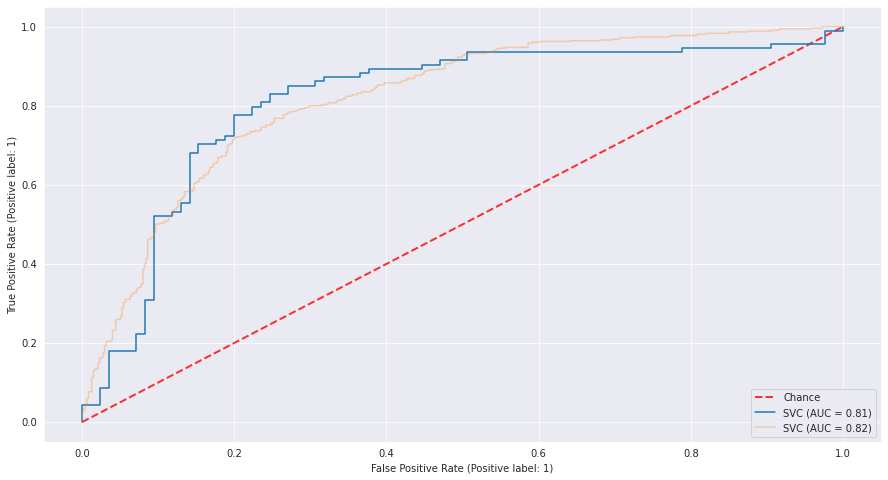

In [25]:
fig,ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plot_roc_curve(model_svc, X_test, y_test, ax=ax)
plot_roc_curve(model_svc, X_train, y_train, ax=ax, alpha=0.3)

**ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a `larger area under the curve (AUC) is usually better`.**

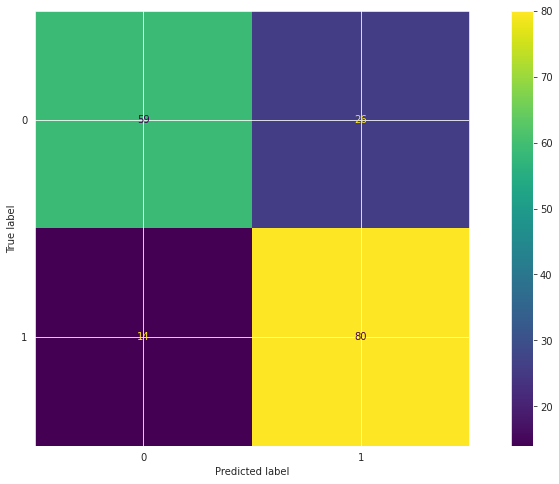

In [26]:
plot_confusion_matrix(model_svc, X_test, y_test)

In [27]:
import pickle

In [28]:
# Saving the model 😊😊🙌😆🍸🎂
filename='model_svc.pkl'
pickle.dump(model_svc, open(filename, 'wb'))

In [29]:
df_prepared.to_csv('prepared_data.csv', index=False)